In [ ]:
!pip install python-docx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 5.0 MB/s eta 0:00:00


In [ ]:
import zipfile
import os
from docx import Document
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


In [ ]:
from google.colab import files
# Step 1: Upload Zip File and Extract
print("Please upload your zip file containing the .docx files.")
uploaded = files.upload()

# Assuming only one file is uploaded
zip_path = list(uploaded.keys())[0]
extraction_folder = '/content/extracted_files'
os.makedirs(extraction_folder, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_folder)


Please upload your zip file containing the .docx files.


Saving Resumes.zip to Resumes (1).zip


In [ ]:
# Step 2: Extract Text from .docx Files
def extract_text_from_docx(file_path):
    try:
        doc = Document(file_path)
        return "\n".join([para.text for para in doc.paragraphs])
    except Exception as e:
        return ""

texts = []
labels = []

In [ ]:
for file in os.listdir(extraction_folder):
    if file.endswith('.docx'):
        file_path = os.path.join(extraction_folder, file)
        texts.append(extract_text_from_docx(file_path))
        # Assign labels based on file names
        if "React" in file:  # Example: categorize based on keywords in the file name
            labels.append("React Developer")
        elif "PeopleSoft" in file:
            labels.append("PeopleSoft Specialist")
        else:
            labels.append("Other")

In [ ]:
# Step 3: Create DataFrame for Analysis
data = pd.DataFrame({'Text': texts, 'Label': labels})
print(data)

                                                 Text                  Label
0   MD KHIZARUDDIN RAUF \n \t EXPERIENCE \n     \n...        React Developer
1   Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...                  Other
2   MAREEDU LOKESH BABU\nPROFESSIONAL OVERVIEW\n  ...        React Developer
3   \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nC O N ...                  Other
4   \n\nJYOTI VERMA\t\t\t\t\t\n\n\n\n3 years of Ex...                  Other
5   \n\n\n\n\n\n\n\n\n\n\n\n\n\nPROFILE SUMMARY\n\...                  Other
6   Ranga Gaganam  \n \n \nHaving 1+ years of succ...        React Developer
7   BUDDHA VAMSI                                  ...                  Other
8    RAJU PAVANA KUMARI\n\n\nProfessional Summary:...                  Other
9   \nAradhana Tripathi\n\nCurrent Location: Gachi...                  Other
10  Tanna Sujatha \n\n\n\nOBJECTIVE\nSeeking a cha...                  Other
11                                      resume\n\n...                  Other

In [ ]:
# Step 4: Preprocess Text
data['Text'] = data['Text'].str.replace(r'\n', ' ', regex=True).str.lower().str.strip()
print(data['Text'])

0     md khizaruddin rauf   \t experience        ⇨ c...
1     ramesh a\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...
2     mareedu lokesh babu professional overview    a...
3     c o n t a c t :  address: manyata tech park, n...
4     jyoti verma\t\t\t\t\t    3 years of experience...
5     profile summary  i have overall 6.8 years’ exp...
6     ranga gaganam       having 1+ years of success...
7     buddha vamsi                                  ...
8     raju pavana kumari   professional summary: hav...
9     aradhana tripathi  current location: gachibowl...
10    tanna sujatha     objective seeking a challeng...
11    resume   ramalakshmi k\t\t\t\t      career obj...
12    murali  experience summary   i have 6 years of...
13    anubhav kumar singh\t\t    to work in a global...
14    kanumuru deepak reddy    career objective:  to...
15    name: ravali p                                ...
16    chinna subbarayudu m dob: 06th march 1994 nati...
17    peoplesoft admin varkala vikas  career obj

#Exploratory data analysis


In [ ]:
# Step 5: EDA
data['WordCount'] = data['Text'].str.split().apply(len)
print(data.describe())
print("Sample Data:\n", data.head())

         WordCount
count    52.000000
mean    542.730769
std     329.309683
min     133.000000
25%     335.250000
50%     506.000000
75%     642.750000
max    2038.000000
Sample Data:
                                                 Text            Label  \
0  md khizaruddin rauf   \t experience        ⇨ c...  React Developer   
1  ramesh a\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...            Other   
2  mareedu lokesh babu professional overview    a...  React Developer   
3  c o n t a c t :  address: manyata tech park, n...            Other   
4  jyoti verma\t\t\t\t\t    3 years of experience...            Other   

   WordCount  
0        380  
1        709  
2        324  
3        393  
4        465  


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data['WordCount'] = data['Text'].str.split().apply(len)
data['CharacterCount'] = data['Text'].str.len()
data['AverageWordLength'] = data['CharacterCount'] / data['WordCount']

print(data.describe())
print("Sample Data:\n", data.head())

         WordCount  CharacterCount  AverageWordLength
count    52.000000       52.000000          52.000000
mean    542.730769     4021.423077           7.536798
std     329.309683     2395.342821           0.896205
min     133.000000      992.000000           5.323155
25%     335.250000     2616.750000           7.112065
50%     506.000000     3620.000000           7.474398
75%     642.750000     5032.500000           7.616477
max    2038.000000    15339.000000          11.957143
Sample Data:
                                                 Text            Label  \
0  md khizaruddin rauf   \t experience        ⇨ c...  React Developer   
1  ramesh a\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...            Other   
2  mareedu lokesh babu professional overview    a...  React Developer   
3  c o n t a c t :  address: manyata tech park, n...            Other   
4  jyoti verma\t\t\t\t\t    3 years of experience...            Other   

   WordCount  CharacterCount  AverageWordLength  
0        38

Text(0.5, 1.0, 'Word Count Distribution')

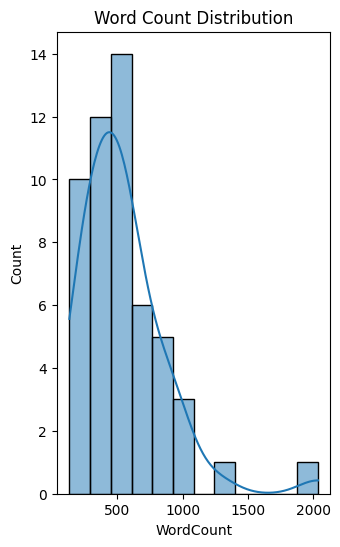

In [ ]:
# Visualizations
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.histplot(data['WordCount'], kde=True)
plt.title('Word Count Distribution')

Text(0.5, 1.0, 'Character Count Distribution')

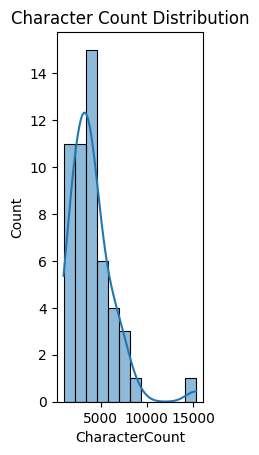

In [ ]:
plt.subplot(1, 3, 2)
sns.histplot(data['CharacterCount'], kde=True)
plt.title('Character Count Distribution')


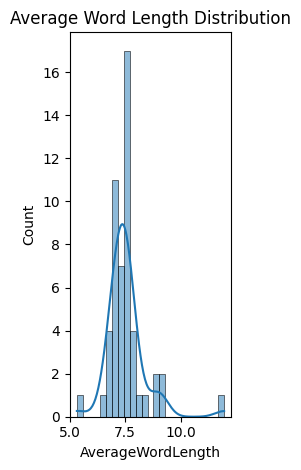

In [ ]:
plt.subplot(1, 3, 3)
sns.histplot(data['AverageWordLength'], kde=True)
plt.title('Average Word Length Distribution')

plt.tight_layout()
plt.show()

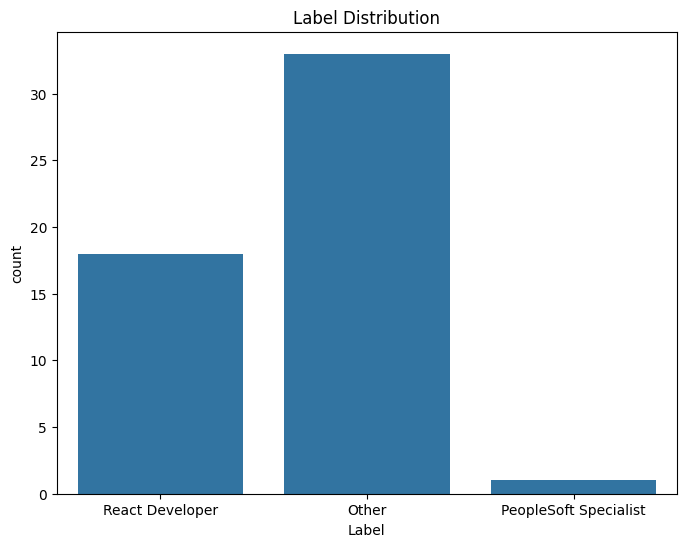

In [ ]:
# Label Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=data)
plt.title('Label Distribution')
plt.show()

In [ ]:
# Word Cloud (requires wordcloud library)
!pip install wordcloud
from wordcloud import WordCloud

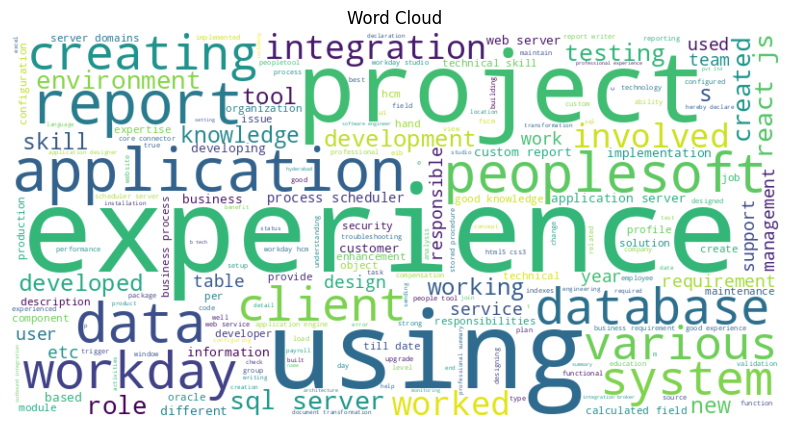

In [ ]:
text = " ".join(data['Text'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud')
plt.show()

In [ ]:
#Further analysis (example -  average word count by label)
average_word_count_by_label = data.groupby('Label')['WordCount'].mean()
print("\nAverage Word Count by Label:\n", average_word_count_by_label)


Average Word Count by Label:
 Label
Other                     604.909091
PeopleSoft Specialist    2038.000000
React Developer           345.666667
Name: WordCount, dtype: float64


In [ ]:
# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['Label'], test_size=0.2, random_state=42)

In [ ]:
# Step 7: Vectorization
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

#Model Training & Evaluation


In [ ]:
# Step 8: Model Training and Evaluation
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(classification_report(y_test, predictions))
    print(f"Accuracy: {accuracy_score(y_test, predictions):.2f}")


In [ ]:
# Naive Bayes
print("Naive Bayes")
nb_model = MultinomialNB()
evaluate_model(nb_model, X_train_vec, y_train, X_test_vec, y_test)


Naive Bayes
                 precision    recall  f1-score   support

          Other       0.89      1.00      0.94         8
React Developer       1.00      0.67      0.80         3

       accuracy                           0.91        11
      macro avg       0.94      0.83      0.87        11
   weighted avg       0.92      0.91      0.90        11

Accuracy: 0.91


In [ ]:
# Random Forest
print("Random Forest")
rf_model = RandomForestClassifier(random_state=42)
evaluate_model(rf_model, X_train_vec, y_train, X_test_vec, y_test)

Random Forest
                 precision    recall  f1-score   support

          Other       1.00      1.00      1.00         8
React Developer       1.00      1.00      1.00         3

       accuracy                           1.00        11
      macro avg       1.00      1.00      1.00        11
   weighted avg       1.00      1.00      1.00        11

Accuracy: 1.00


In [ ]:
#Support Vector Machine
print("SVM")
svm_model = SVC(kernel='linear')
evaluate_model(svm_model, X_train_vec, y_train, X_test_vec, y_test)

SVM
                 precision    recall  f1-score   support

          Other       1.00      1.00      1.00         8
React Developer       1.00      1.00      1.00         3

       accuracy                           1.00        11
      macro avg       1.00      1.00      1.00        11
   weighted avg       1.00      1.00      1.00        11

Accuracy: 1.00


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
print("Logistic Regression")
lr_model = LogisticRegression(max_iter=1000, random_state=42) # Increased max_iter
evaluate_model(lr_model, X_train_vec, y_train, X_test_vec, y_test)

Logistic Regression
                 precision    recall  f1-score   support

          Other       0.89      1.00      0.94         8
React Developer       1.00      0.67      0.80         3

       accuracy                           0.91        11
      macro avg       0.94      0.83      0.87        11
   weighted avg       0.92      0.91      0.90        11

Accuracy: 0.91


In [ ]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
print("Decision Tree")
dt_model = DecisionTreeClassifier(random_state=42)
evaluate_model(dt_model, X_train_vec, y_train, X_test_vec, y_test)

Decision Tree
                 precision    recall  f1-score   support

          Other       0.89      1.00      0.94         8
React Developer       1.00      0.67      0.80         3

       accuracy                           0.91        11
      macro avg       0.94      0.83      0.87        11
   weighted avg       0.92      0.91      0.90        11

Accuracy: 0.91


In [ ]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
print("Gradient Boosting")
gb_model = GradientBoostingClassifier(random_state=42)
evaluate_model(gb_model, X_train_vec, y_train, X_test_vec, y_test)

Gradient Boosting
                 precision    recall  f1-score   support

          Other       1.00      1.00      1.00         8
React Developer       1.00      1.00      1.00         3

       accuracy                           1.00        11
      macro avg       1.00      1.00      1.00        11
   weighted avg       1.00      1.00      1.00        11

Accuracy: 1.00


--- Naive Bayes ---
                 precision    recall  f1-score   support

          Other       0.89      1.00      0.94         8
React Developer       1.00      0.67      0.80         3

       accuracy                           0.91        11
      macro avg       0.94      0.83      0.87        11
   weighted avg       0.92      0.91      0.90        11

Accuracy: 0.9091
--- Random Forest ---
                 precision    recall  f1-score   support

          Other       1.00      1.00      1.00         8
React Developer       1.00      1.00      1.00         3

       accuracy                           1.00        11
      macro avg       1.00      1.00      1.00        11
   weighted avg       1.00      1.00      1.00        11

Accuracy: 1.0000
--- SVM ---
                 precision    recall  f1-score   support

          Other       1.00      1.00      1.00         8
React Developer       1.00      1.00      1.00         3

       accuracy                           1.00   

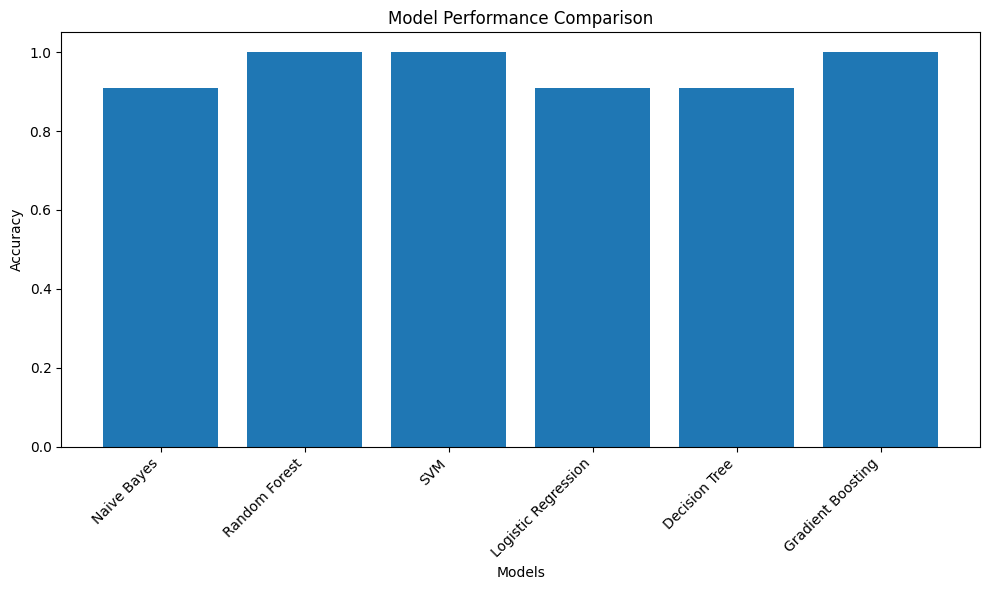

In [ ]:
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"--- {model_name} ---")
    print(classification_report(y_test, predictions))
    print(f"Accuracy: {accuracy:.4f}")  # Increased precision for accuracy
    return accuracy


# Store results for comparison later
results = {}

# Naive Bayes
results['Naive Bayes'] = evaluate_model(MultinomialNB(), X_train_vec, y_train, X_test_vec, y_test, "Naive Bayes")

# Random Forest
results['Random Forest'] = evaluate_model(RandomForestClassifier(random_state=42), X_train_vec, y_train, X_test_vec, y_test, "Random Forest")

# Support Vector Machine
results['SVM'] = evaluate_model(SVC(kernel='linear'), X_train_vec, y_train, X_test_vec, y_test, "SVM")

# Logistic Regression
results['Logistic Regression'] = evaluate_model(LogisticRegression(max_iter=1000, random_state=42), X_train_vec, y_train, X_test_vec, y_test, "Logistic Regression")

# Decision Tree Classifier
results['Decision Tree'] = evaluate_model(DecisionTreeClassifier(random_state=42), X_train_vec, y_train, X_test_vec, y_test, "Decision Tree")

# Gradient Boosting Classifier
results['Gradient Boosting'] = evaluate_model(GradientBoostingClassifier(random_state=42), X_train_vec, y_train, X_test_vec, y_test, "Gradient Boosting")

# Compare model performance
print("\n--- Model Comparison ---")
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy:.4f}")

# Visualize model comparison (optional)
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values())
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()